In [2]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pickle

from time import perf_counter

# INF 554 Lab 2: Low Rank Approximation and Denoising of Images


In this lab we will use the PCA, MDS and SVD algorithms presented in Lecture 1 to obtain low rank approximations and denoise images.



## 1) Low Rank Approximation

We begin by briefly summarising how the three methods used in this lab can be used to obtain low rank approximations of our data. In this lab we will be working with images, where each pixel is encoded by four values, namely RGBA (red, green, blue, alpha). These four dimensions encoding each pixel will be referred to as the four channels of our images. You should create low rank approximations separately for each channel, i.e., to obtain a low rank approxiamtion for the images, you should separately calculate the low rank approximation for each channel of the input image and then concatenate these low rank approximations. Therefore, in this lab our data  will be denoted by $X_i \in R^{n\times m}$ for $i \in \{R,G,B,A\}.$


**SVD:** Consider the singular value decomposition of $X_i = V \Sigma W^T.$ Further, let $V_k \in R^{n\times k},$ $W_k \in R^{m\times k}$ and $\Sigma_k \in R^{k\times k}$ contain the first $k$ left and right singular vectors and the largest $k$ singular values, respectively. Then, the singular value low rank approximation, denoted $\tilde{X}_i^{SVD},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{SVD} = V_k \Sigma_k W_k^T.
\end{equation}



**PCA:** Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. Furthermore, let $U_k\in R^{m\times k}$ denote the right singular vectors of $C_i$ corresponding to the largest $k$ singular values. Then, the PCA low-rank approximation, denoted $\tilde{X}_i^{PCA},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{PCA} = C_i U_k U_k^T + M_i.
\end{equation}




**MDS:** 
Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. 
For the multidimensional scaling algorithm we utilise the singular value decomposition of the matrix denoted $C_i C_i^T.$ Let $Q_k \in R^{n\times k}$ denote the matrix containing the $k$ left singular vectors corresponding to the $k$ largest singluar values of $C_i C_i^T.$ Then, the low rank approximation, denoted $\tilde{X}_i^{MDS},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{MDS} =  Q_k Q_k^T C_i +M_i.
\end{equation}

















We begin with a theoretical question.

>**Question 1:** The principal components produced in the PCA algorithm estimate $C_i U_{j}^\star,$ where $U_{j}^\star$ contains the $j^{\mathrm{th}}$ eigenvector of the *true* covariance matrix ($Var[C_i]$) of our data. Prove that the true principal components $C_i U_{j}^\star$ for $j \in \{1,\ldots, m\}$ are uncorrelated and relate their variance to the eigenvalues of the true covariance matrix. *Hint:* Consider $Var[C_i U_j^\star]$ to answer this question. 


Now we load the image you will be working with in this lab.





Data type:  <class 'numpy.ndarray'>
Shape:  (522, 300, 4)


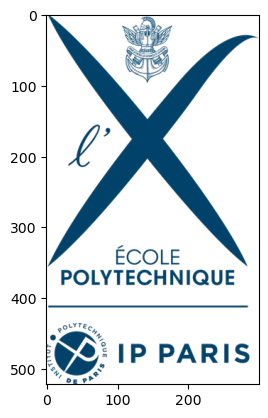

In [3]:

logo = mpimg.imread('IPPX_logo.png') 

print("Data type: ", type(logo)); print("Shape: ", logo.shape)

plt.imshow(logo) 
plt.show()


>**Task 1:** Complete the below functions to calculate low rank approximations of an input image with 4 channels using the PCA, SVD and MDS algorithms. To allow you to understand how these methods function in detail we ask you to please code the methods from first-principles, i.e., to not make use of the relevant scikit learn functions; in the case of the singular value decomposition please do make use of the ``np.linealg.svd()`` function. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


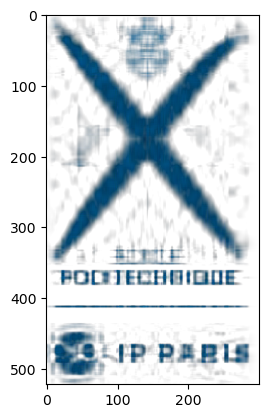

array([[[ 2.35294629e-05,  4.41703619e-03,  1.26791494e-02,
          5.17635315e-04],
        [ 1.33200620e-05,  6.55027945e-03,  1.83754116e-02,
          1.00347924e-03],
        [ 2.22709405e-05,  7.67647708e-03,  1.96861159e-02,
          9.31646326e-04],
        ...,
        [ 0.00000000e+00, -1.75543828e-04, -1.26114325e-03,
          6.74638159e-06],
        [ 0.00000000e+00, -1.99638263e-04, -1.48288754e-03,
          3.24684220e-06],
        [ 0.00000000e+00, -1.90715829e-04, -9.11426789e-04,
          1.06065011e-06]],

       [[ 7.84315398e-06,  2.20658910e-03,  5.64902602e-03,
          8.73255252e-04],
        [ 4.44001989e-06,  3.98340682e-03,  1.17702484e-02,
          1.74725812e-03],
        [ 7.42364591e-06,  3.80322034e-03, -7.88270612e-04,
          1.64085906e-03],
        ...,
        [ 0.00000000e+00, -4.53242945e-04, -2.79230706e-04,
         -3.98004386e-06],
        [ 0.00000000e+00, -4.60145355e-04,  3.95537762e-04,
         -4.81107463e-06],
        [ 0.000

In [52]:
def svd(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #Please insert the code for Task 1 here
    #
    

    for i in range (4):    
        U, S, V=np.linalg.svd((X[:,:,i]), full_matrices=True)

        U=U[:,:k]
        S=S[:k]
        S=np.diag(S)
        V=V[:k,:]
        matrix=U@S@V

        X[:,:,i]=matrix     
    

    plt.imshow(X) 
    plt.show()

    
    return X




def pca(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
        U (np.array, dim: m,k,4): singular vectors used to obtain the low rank approximation
    """

    for i in range (4):
        matrix=X[:,:,i]
        Mvector=np.mean(X, axis=1)

        


        for j in range(len(matrix[:,1])):


        

    
    

    
    
    return X_low_rank_approx, U



def mds(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #Please insert the code for Task 1 here
    #

    
    return X_low_rank_approx


svd(logo, 10)
#mds(logo, 60)





        
      




>**Task 2:** Apply the functions implemented in Task 1 to produce low rank approximation images for $k$ equals 1, 5, 10, 30 and 60 of the logo and plot the results using the provided function.

In [ ]:

results_task2 = np.zeros(logo.shape + tuple([20]))


#Please insert the code for Task 2 here



fig, axs = plt.subplots(3,5, figsize=(8,10))


titles = ['k = 1','k = 5','k = 10','k = 30','k = 60']
methods = ['SVD', 'PCA', 'MDS']
for i in range(3):
    axs[i,0].set_ylabel(methods[i], fontsize=16,fontweight='bold')
    for j in range(5):
        if i==0:
            axs[i,j].set_title(titles[j], fontweight='bold')
        axs[i,j].imshow(np.clip(results_task2[:,:,:,i*5+j],0,1))
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
fig.tight_layout(pad=0)


>**Question 2:** Visually compare the low rank approximations and qualitatively assess (i) how the quality of the low rank approximation varies as $k$ increases and (ii) which method produces the least lossy compression of the image. (No calculations or further processing are required here).



The quality of the PCA reconstruction is often evaluated by calculating the fraction of the total variance of the image that is preserved in the reconstructed image. Hence, the first evaluation metric we want to use to assess the quality of the reconstruction is the sum of the eigenvalues of the estimated covariance matrix $(\tilde{C}_i^{h})^T \tilde{C}_i^{h}/n$ for $h \in \{\text{SVD, PCA, MDS}\}$ divided by the sum of eigenvalues of the estimated covariance matrix of the original image $C_i^T C_i/m.$ The final metric is produced by averaging the fraction of the sum of eigenvalues over all four image channels.

The MDS algorithm minimises the *Stress* metric, which is calculated as follows,
\begin{equation}
    Stress = \sqrt{\dfrac{\sum_{a=1}^n \sum_{b=1}^n (d_{ab} - \delta_{ab})^2}{\sum_{a=1}^n \sum_{b=1}^n \delta_{ab}^2}},
\end{equation} 
where $d_{ab}$ the Euclidian distance between rows $a$ and $b$ of matrix $\tilde{X}_i^{h}$ for $h \in \{\text{SVD, PCA, MDS}\}$ and $\delta_{ab}$ contains the Euclidian distance between rows $a$ and $b$ of $X_i$. Again the final metric is produced by averaging the Stress metric over all four image channels.

The performance of the SVD reconstruction is commonly measured using the difference of the original image and the reconstructed image in Frobenius norm. This will be the third metric we will consider to compare our low rank approximations.

>**Task 3:** Fill out the code to calculate the three presented evaluation metrics of our methods. Then use these functions to quanititatively assess the approximation error of our three methods when $k=10.$ Fill your results into the provided table. 

In [ ]:
def evals(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        eval_fraction (float): the ratio of the explained variance as described in the problem description
    """
    
    #Please insert the code for Task 3 here

    
    
    
    return eval_fraction

def stress(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        stress (float): the stress metric value
    """
    
    #Please insert the code for Task 3 here

    
    
    
    return stress


def Fnorm_difference(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        diff (float): the difference of the two inputs in Frobenius norm
    """
    
    #Please insert the code for Task 3 here

    
    return diff




results_task3 = np.zeros(shape=[3,3])

k = 10

results_task3[0,0] = evals(logo, svd(logo,k))
results_task3[1,0] = evals(logo, pca(logo,k)[0])
results_task3[2,0] = evals(logo, mds(logo,k))

results_task3[0,1] = stress(logo, svd(logo,k))
results_task3[1,1] = stress(logo, pca(logo,k)[0])
results_task3[2,1] = stress(logo, mds(logo,k))

results_task3[0,2] = Fnorm_difference(logo, svd(logo,k))
results_task3[1,2] = Fnorm_difference(logo, pca(logo,k)[0])
results_task3[2,2] = Fnorm_difference(logo, mds(logo,k))


metrics = ['evals', 'stress', 'norm']
methods = ['SVD', 'PCA', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(3):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task3[i,j],4),'\t', end='')
    print('')


## 2) Orthogonal Transformation of the Input Data

Now we will work with another image, which was obtained from the logo we have been working with so far, by applying a random orthogonal transformation to the pixel values. Hence, if $X_i$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the original image and  $X_i'$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the transformed image, then they are related as follows,
$$
X_i' = X_i Q \qquad ~ \qquad \forall i,
$$
where $Q$ is an orthogonal matrix which was randomly sampled.

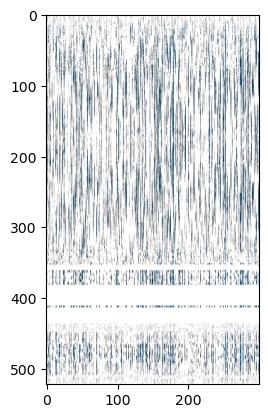

In [53]:
with open('transformed_image.pickle', 'rb') as f:
    transformed_image = pickle.load(f)
    
    
plt.imshow(np.clip(transformed_image,0,1))
plt.show()

We now repeat task 3 on the transformed image. 




In [54]:
results_orthogonal = np.zeros(shape=[3,3])

k = 10


start_svd_evals = perf_counter()
results_orthogonal[0,0] = evals(transformed_image, svd(transformed_image,k))
end_svd_evals = perf_counter()
time_svd_evals = end_svd_evals - start_svd_evals

start_pca_evals = perf_counter()
results_orthogonal[1,0] = evals(transformed_image, pca(transformed_image,k)[0])
end_pca_evals = perf_counter()
time_pca_evals = end_pca_evals - start_pca_evals


start_mds_evals = perf_counter()
results_orthogonal[2,0] = evals(transformed_image, mds(transformed_image,k))
end_mds_evals = perf_counter()
time_mds_evals = end_mds_evals - start_mds_evals

print('Computation times for evals metric: \t SVD: %.2f, \t PCA: %.2f, \t  MDS: %.2f' %(time_svd_evals, time_pca_evals, time_mds_evals))



start_svd_stress = perf_counter()
results_orthogonal[0,1] = stress(transformed_image, svd(transformed_image,k))
end_svd_stress = perf_counter()
time_svd_stress = end_svd_stress - start_svd_stress

start_pca_stress = perf_counter()
results_orthogonal[1,1] = stress(transformed_image, pca(transformed_image,k)[0])
end_pca_stress = perf_counter()
time_pca_stress = end_pca_stress - start_pca_stress


start_mds_stress = perf_counter()
results_orthogonal[2,1] = stress(transformed_image, mds(transformed_image,k))
end_mds_stress = perf_counter()
time_mds_stress = end_mds_stress - start_mds_stress

print('Computation times for stress metric: \t SVD: %.2f, PCA: %.2f, \t \t MDS: %.2f' %(time_svd_stress, time_pca_stress, time_mds_stress))


start_svd_Fnorm_difference = perf_counter()
results_orthogonal[0,2] = Fnorm_difference(transformed_image, svd(transformed_image,k))
end_svd_Fnorm_difference = perf_counter()
time_svd_Fnorm_difference = end_svd_Fnorm_difference - start_svd_Fnorm_difference

start_pca_Fnorm_difference = perf_counter()
results_orthogonal[1,2] = Fnorm_difference(transformed_image, pca(transformed_image,k)[0])
end_pca_Fnorm_difference = perf_counter()
time_pca_Fnorm_difference = end_pca_Fnorm_difference - start_pca_Fnorm_difference

start_mds_Fnorm_difference = perf_counter()
results_orthogonal[2,2] = Fnorm_difference(transformed_image, mds(transformed_image,k))
end_mds_Fnorm_difference = perf_counter()
time_mds_Fnorm_difference = end_mds_Fnorm_difference - start_mds_Fnorm_difference

print('Computation times for Fnorm_difference metric: \t SVD: %.2f, \t PCA: %.2f, \t MDS: %.2f' %(time_svd_Fnorm_difference, time_pca_Fnorm_difference, time_mds_Fnorm_difference))


metrics = ['evals', 'stress', 'norm']
methods = ['SVD', 'PCA', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(3):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_orthogonal[i,j],4),'\t', end='')
    print('')
    

NameError: name 'evals' is not defined

>**Question 3:** Prove that the low rank approximations of $X_i$ and $X_i'$ obtained using the PCA algorithm capture equal amounts of the variance of the two images. Furthermore, prove that the principal components ($C_i U_{jk},$ and $C_i' U_{jk}'$ for $j\in \{1,\ldots, k\})$ are equal. (Note that in practice you might encounter principal components which are unequal since the obtained eigenvectors have opposing signs. This should not be a problem for you here since this question should be answered using a theoretical pen and paper proof.)  

## 3) Image Denoising

In this section we will use the eigenvectors used in the PCA of the original logo to denoise two noisy images of the logo. In the cell below we load the two noisy images.

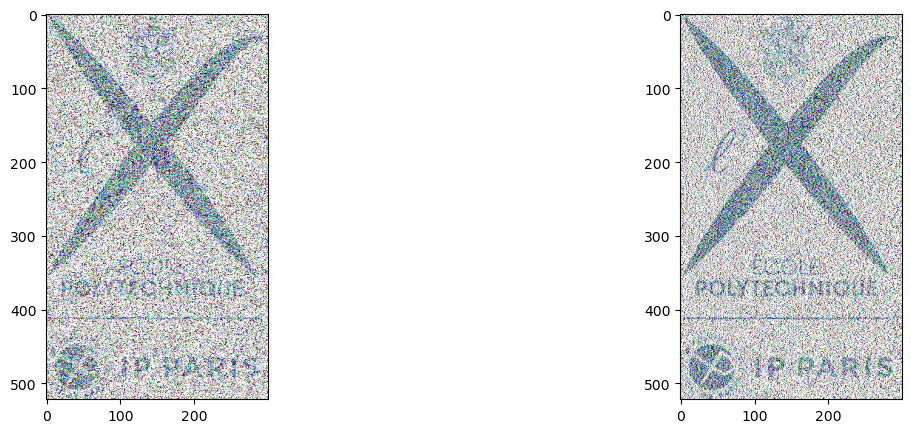

In [55]:
with open('noisy_image1.pickle', 'rb') as f:
    noisy_image1 = pickle.load(f)
    
with open('noisy_image2.pickle', 'rb') as f:
    noisy_image2 = pickle.load(f)
    
fig, axs = plt.subplots(1,2, figsize=(15,5))  
axs[0].imshow(np.clip(noisy_image1,0,1))
axs[1].imshow(np.clip(noisy_image2,0,1))
plt.show()

**Task 4:** Use the eigenvectors used in the PCA algorithm on the original image to obtain low rank approximations of the noisy images. Use the number of eigenvectors which minimises the distance of the denoised image and the original logo in the Frobenius norm metric introduced in Section 1). To find the minimum we recommend you search reconstructions using $\{1, 2, \ldots, 100\}$ eigenvectors. 

In [ ]:
#preprocessing
n,m,D = logo.shape


C_noisy1 = np.zeros(logo.shape)
M_noisy1 = np.zeros(logo.shape[1:])
for d in range(D):
    M_noisy1[:,d] = np.mean(noisy_image1[:,:,d],axis=0)  
    C_noisy1[:,:,d] = noisy_image1[:,:,d] - M_noisy1[:,d]

C_noisy2 = np.zeros(logo.shape)
M_noisy2 = np.zeros(logo.shape[1:])
for d in range(D):
    M_noisy1[:,d] = np.mean(noisy_image2[:,:,d],axis=0)  
    C_noisy2[:,:,d] = noisy_image2[:,:,d] - M_noisy2[:,d]


In [ ]:
denoised_image1 = np.zeros(logo.shape)

#Denoise Image 1
n,m,D = logo.shape
approximation_error_F_norm = np.zeros(100)


for i,k in enumerate(range(100)):
    
    #Please insert the code for Task 4 here

    approximation_error_F_norm[i] = #Please insert the code for Task 4 here


plt.plot(np.arange(100), approximation_error_F_norm,'o')
plt.show()

print('The minimal Frobenius norm value was obtained at k=%d' %(np.arange(100)[np.argmin(approximation_error_F_norm)]))

In [ ]:
denoised_image2 = np.zeros(logo.shape)

#Denoise Image 2
n,m,D = logo.shape
approximation_error_F_norm = np.zeros(100)


for i,k in enumerate(range(100)):
    
    #Please insert the code for Task 4 here
    
    approximation_error_F_norm[i] = #Please insert the code for Task 4 here


plt.plot(np.arange(100), approximation_error_F_norm,'o')
plt.show()

print('The minimal Frobenius norm value was obtained at k=%d' %(np.arange(100)[np.argmin(approximation_error_F_norm)]))

In [ ]:
denoised_image1 = np.zeros(logo.shape)
denoised_image2 = np.zeros(logo.shape)


n,m,D = logo.shape
k1_optimal = #Please insert the code for Task 4 here
k2_optimal = #Please insert the code for Task 4 here


#Please insert the code for Task 4 here

    
    

fig, axs = plt.subplots(1,5, figsize=(15,5))    
axs[0].imshow(logo)
axs[1].imshow(np.clip(noisy_image1,0,1))
axs[2].imshow(np.clip(denoised_image1,0,1))
axs[3].imshow(np.clip(noisy_image2,0,1))
axs[4].imshow(np.clip(denoised_image2,0,1))



titles = ['original', 'noisy logo 1', 'k= %d'%(k1_optimal), 'noisy logo 2', 'k= %d'%(k2_optimal)]
for i in range(5):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(titles[i], fontweight='bold')
fig.tight_layout(pad=0)



**Question 4:** Comment on how the low rank approximation affects the level of noise in the images and explain the observed change in the level of noise visible in the low rank approximations. 

**Question 5:** Are you able to draw conclusions about the structural properties of the noise added to the two images from your success in denoising them?